#**Week 15 - Group Activity on Probability for Data Science**

_Jio fibre wants to implement AI/ML in their systems. The activity task
is to build a network intrusion detector, a predictive model capable of
distinguishing between ``bad&#39;&#39; connections, called
intrusions or attacks, and ``good&#39;&#39; normal connections.
This database contains a standard set of data to be audited, which
includes a wide variety of intrusions in the network environment. Your
target is building a machine efficient learning model using
probabilistic approach models, probabilities of bad or good
connections using naïve bayes model. This is a multi-class
classification. Fine tune the model and make a model which has at
least 97 percent accuracy._

##**1. Read the dataset to the python environment**

######***Importing necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


######***Reading dataset tcp-connection (1).csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/tcp-connection (1).csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serrer_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,142,0.0,0.0,0.0,0.0,1.00,0.00,0.01,139,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.0,0.0,0.0,1.00,0.00,1.00,5,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,6,1.0,1.0,0.0,0.0,0.03,0.07,0.00,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


######***Displaying the last 5 observations***

In [4]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serrer_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
494016,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,263,5,1.0,1.0,0.0,0.0,0.02,0.06,0.0,255,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'
494017,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
494018,0,b'tcp',b'smtp',b'SF',2152,327,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,135,123,0.91,0.02,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',283,1270,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.00,0.00,0.0,7,255,1.00,0.00,0.14,0.06,0.0,0.0,0.0,0.0,b'normal.'
494020,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,206,3,0.0,0.0,1.0,1.0,0.01,0.07,0.0,255,3,0.01,0.07,0.00,0.00,0.0,0.0,1.0,1.0,b'neptune.'


##**2. Do necessary pre-processing steps**

##***Basic details***

######***Identifying the basic details of the dataset***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [6]:
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serrer_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
count,494021.000000,494021,494021,494021,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.0,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,b'icmp',b'ecr_i',b'SF',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'smurf.'
freq,NaN,283602,281400,378440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280790
mean,47.979302,NaN,NaN,NaN,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.285690,292.906557,0.176687,0.176609,0.057433,0.057719,0.791547,0.020982,0.028997,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,NaN
std,707.746472,NaN,NaN,NaN,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,0.010551,0.007793,2.012718,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147412,246.322817,0.380717,0.381017,0.231623,0.232147,0.388189,0.082205,0.142397,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


######***Finding the no: of Observations***

In [7]:
df.shape

(494021, 42)

######***Checking for null values***

In [8]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


##***Label Encoding***

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in ['protocol_type', 'service', 'flag']:
    df[i] = labelencoder.fit_transform(df[i])

##***Feature Reduction***

In [10]:
df.drop(['num_outbound_cmds', 'is_host_login'], axis=1, inplace=True)

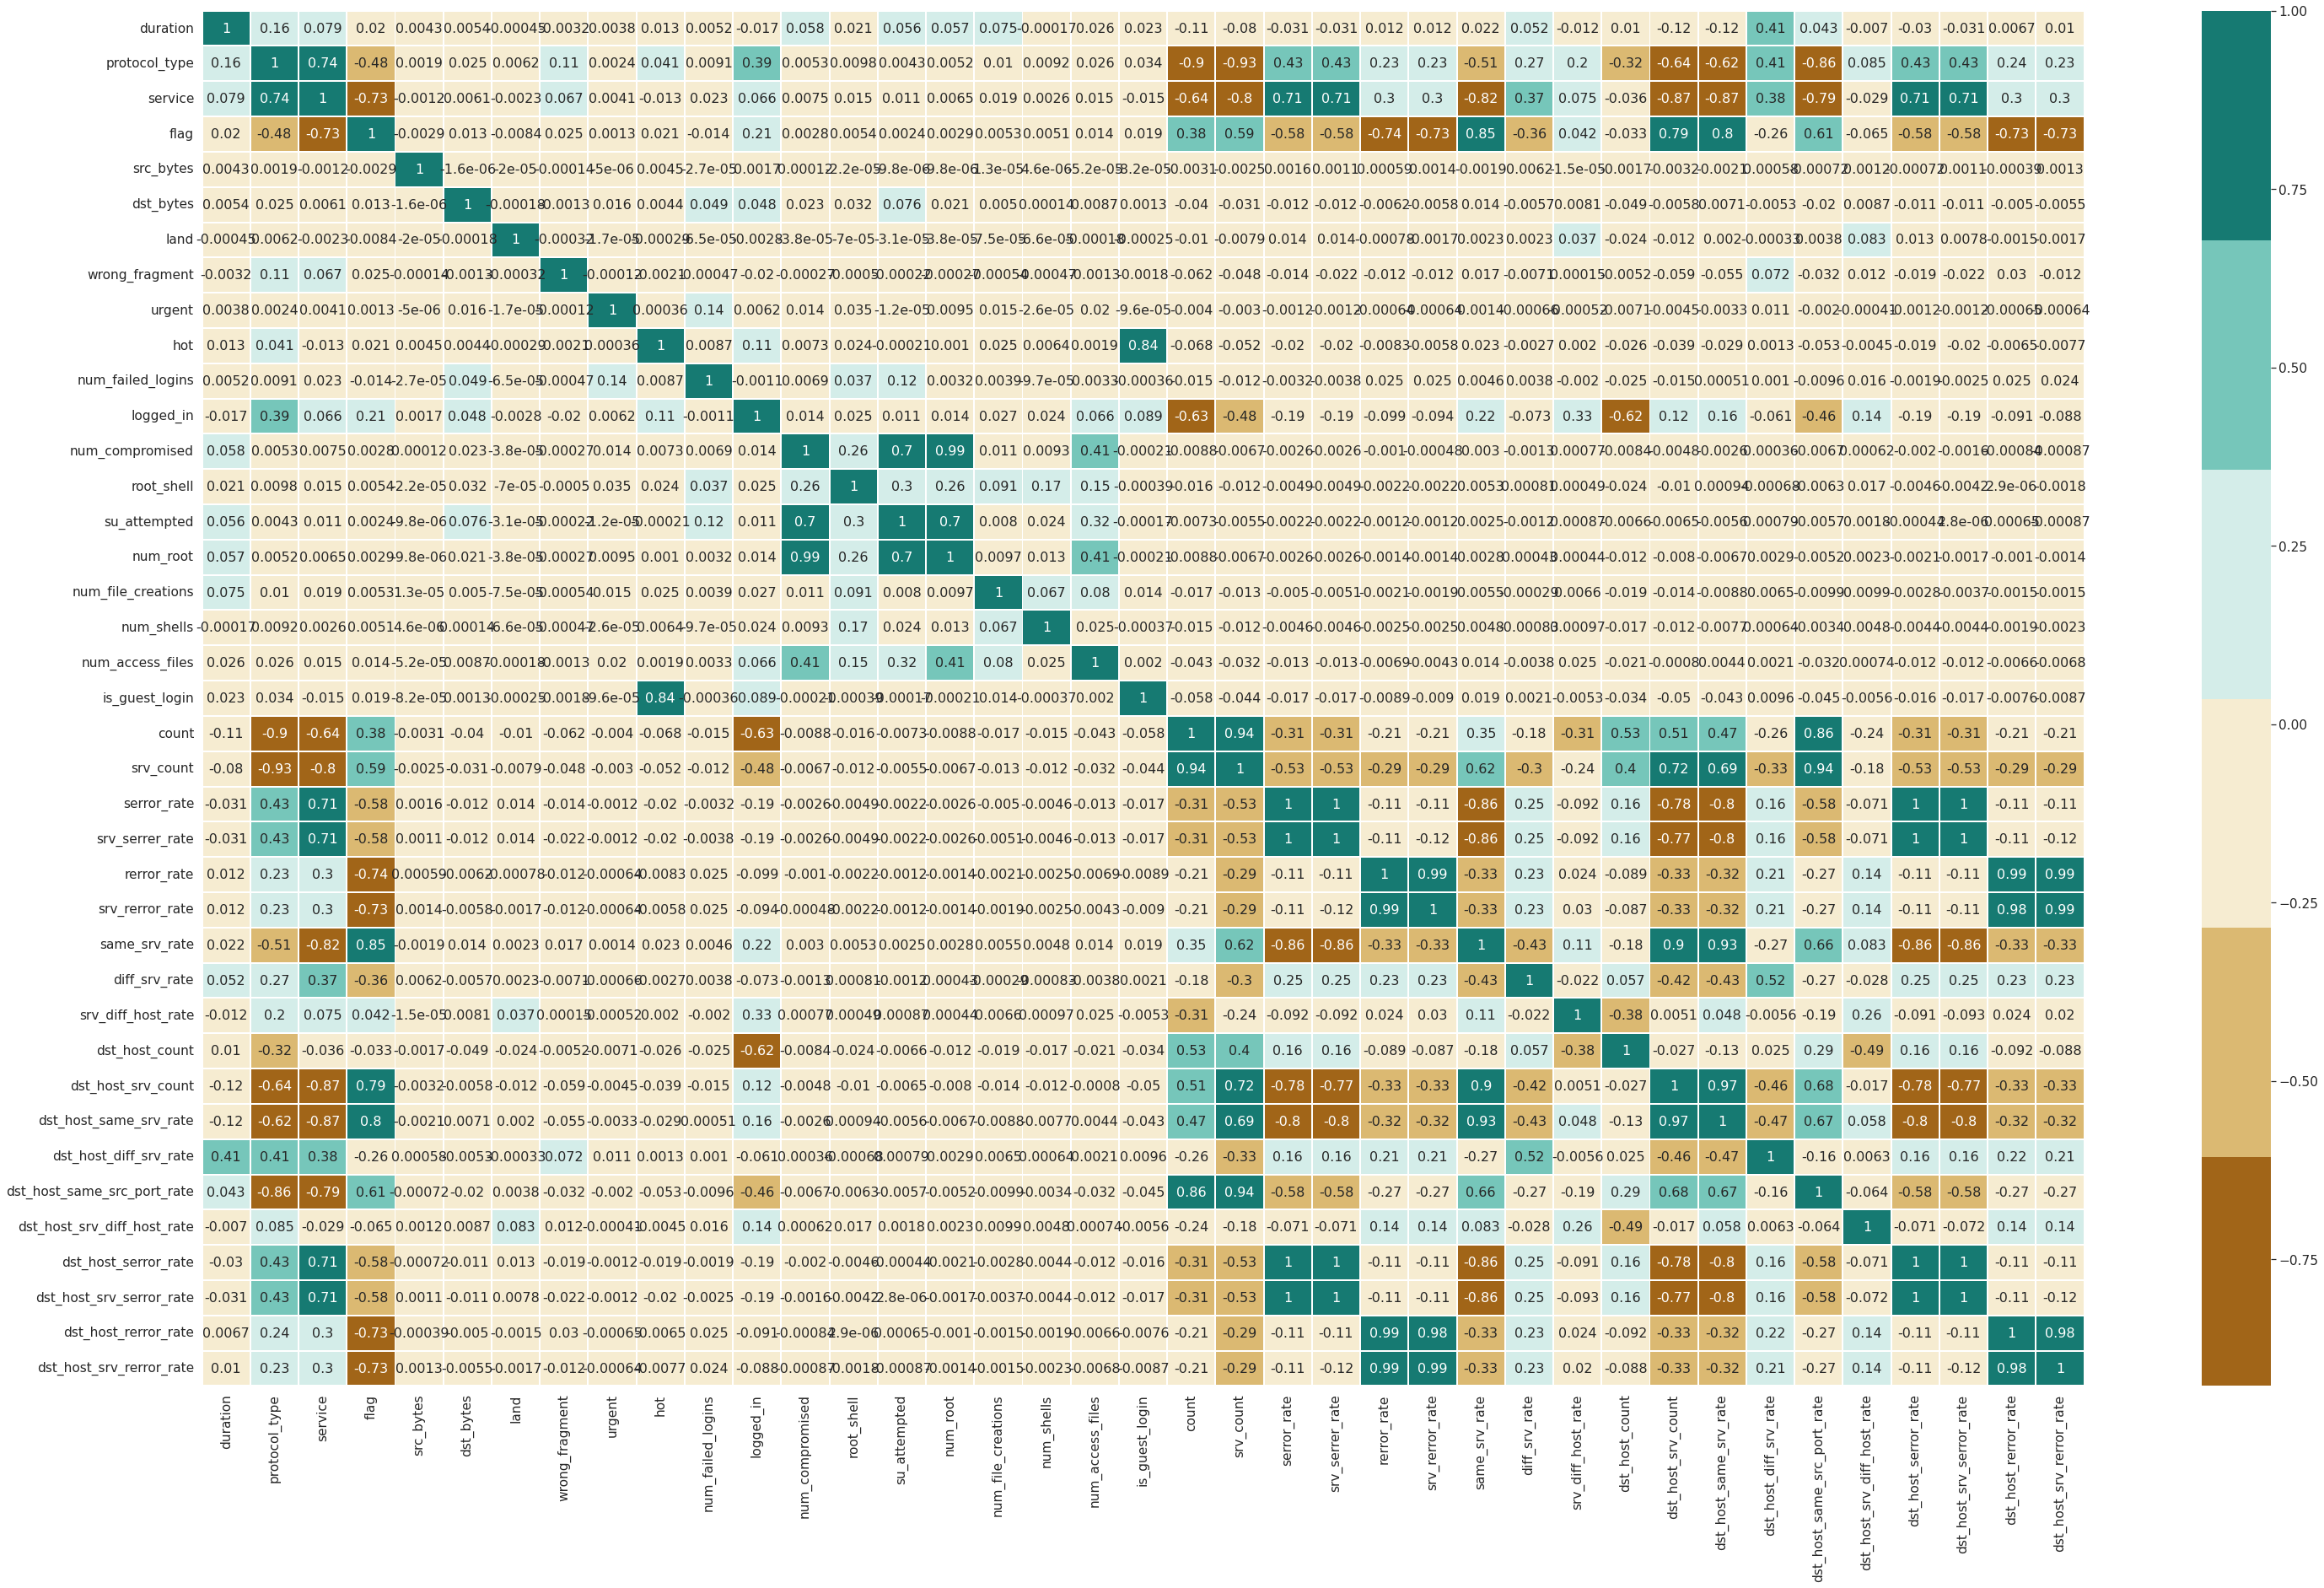

In [11]:
sns.set(font_scale=1.4)
corrmatrix=df.corr()
plt.subplots(figsize=(50,30))
colormap = sns.color_palette("BrBG")
sns.heatmap(corrmatrix, annot=True, linewidth=1, cmap=colormap, annot_kws={"size": 16})

In [12]:
df.drop(['num_root', 'srv_count', 'rerror_rate', 'dst_host_same_src_port_rate'], axis=1, inplace=True)

In [13]:
df.drop(['dst_host_rerror_rate', 'srv_rerror_rate'], axis=1, inplace=True)

In [14]:
df.drop(['serror_rate', 'dst_host_srv_serror_rate'], axis=1, inplace=True)

In [15]:
df.drop(['dst_host_srv_count'], axis=1, inplace=True)

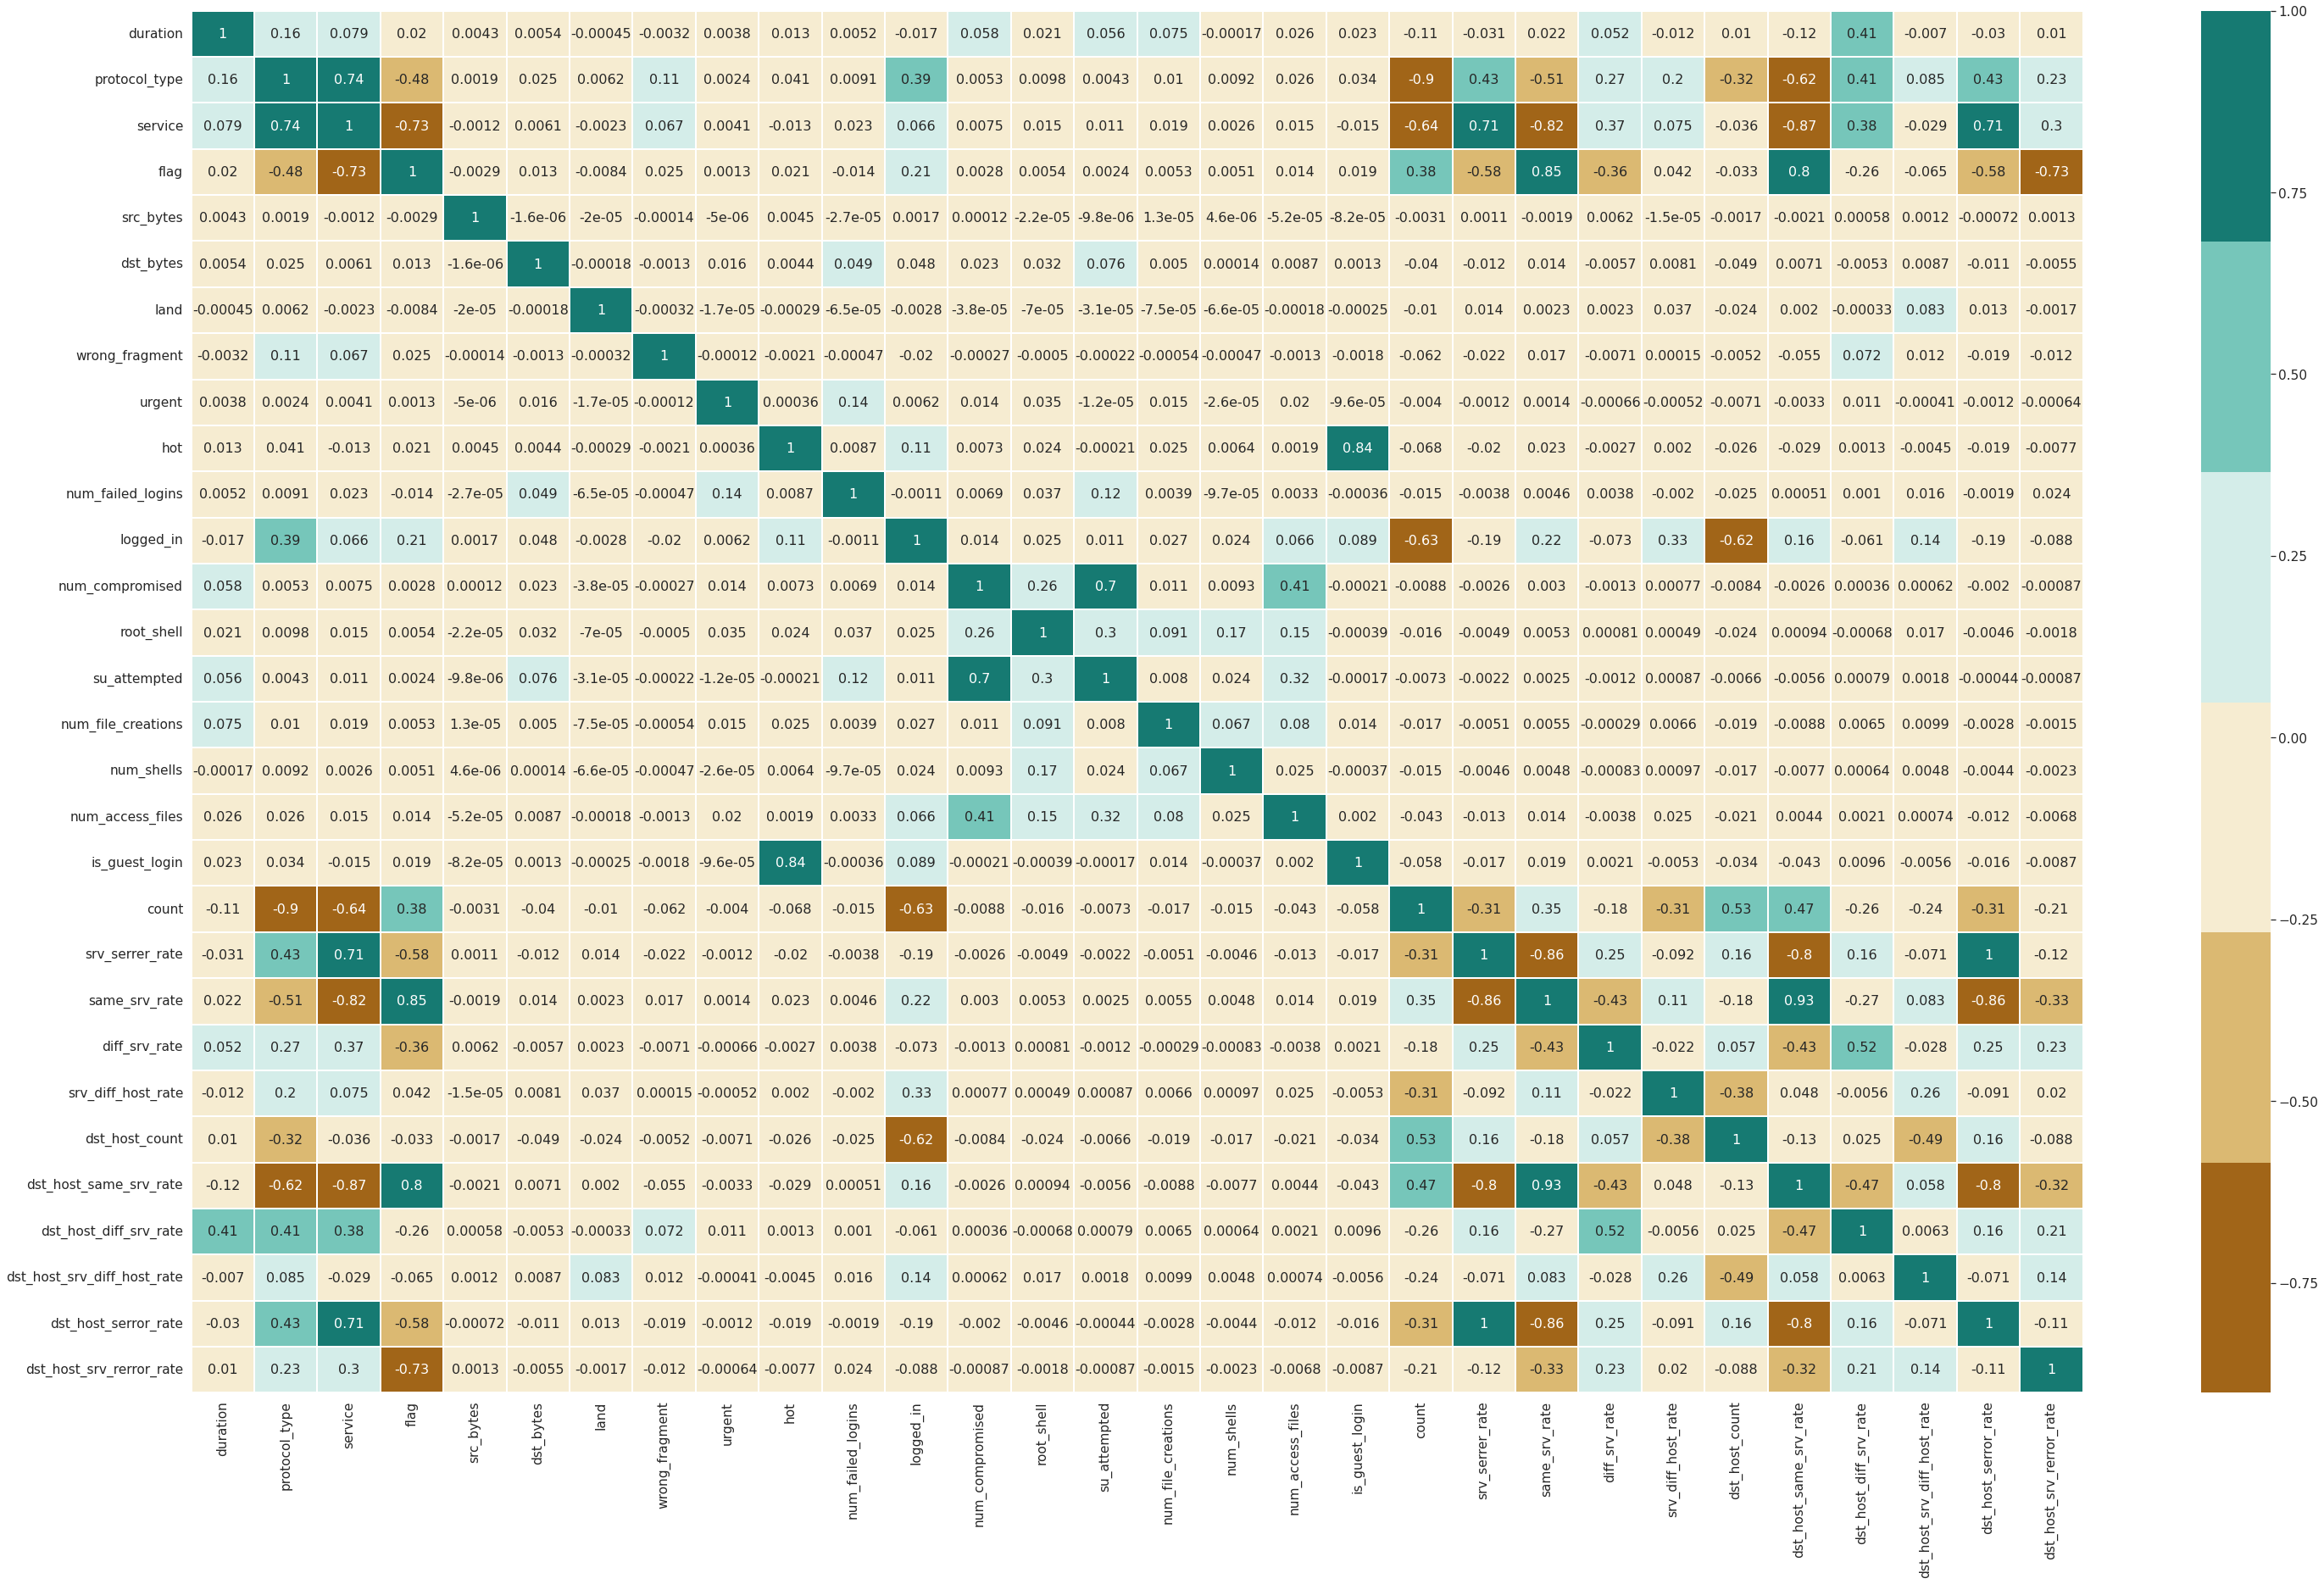

In [16]:
sns.set(font_scale=1.4)
corrmatrix=df.corr()
plt.subplots(figsize=(50,30))
colormap = sns.color_palette("BrBG")
sns.heatmap(corrmatrix, annot=True, linewidth=1, cmap=colormap, annot_kws={"size": 16})

In [17]:
df.shape

(494021, 31)

##**3. Find out which classification model gives the best result.**

######***Defining the variable X and y***

In [18]:
y = df['intrusion']
X = df.drop(['intrusion'], axis = 1)

######***Feature Scaling***

In [19]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

######***Importing train_test_split from the sklearn.model_selection library and splitting the data, by keeping 75% of the data in train dataset and the rest 25% in test dataset***

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

##***Logistic Regression Model***
######***Training our model***

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 74.68


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


######***Making predictions based on our model***

In [22]:
start_time = time.time()
predictions=logreg.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.05


######***Evaluating the accuracy of a model***

In [23]:
print('Accuracy of Logistic regression classifier on training set:', round(logreg.score(X_train, y_train),2))
print('Accuracy score of Logistic regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Logistic regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Logistic regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Logistic regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Logistic regression classifier on training set: 1.0
Accuracy score of Logistic regression classifier on test set: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score of Logistic regression classifier on test set: 0.65
Recall score of Logistic regression classifier on test set: 0.57
F1 score of Logistic regression classifier on test set: 0.6


##***Decision Tree Model***
######***Training our model***



In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 2.47


######***Making predictions based on our model***

In [25]:
start_time = time.time()
predictions = dt.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.03


######***Evaluating the accuracy of a model***

In [26]:
print('Accuracy of Decision Tree regression classifier on training set:', round(dt.score(X_train, y_train),2))
print('Accuracy score of Decision Tree regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Decision Tree regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Decision Tree regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Decision Tree regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Decision Tree regression classifier on training set: 1.0
Accuracy score of Decision Tree regression classifier on test set: 1.0
Precision score of Decision Tree regression classifier on test set: 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score of Decision Tree regression classifier on test set: 0.8
F1 score of Decision Tree regression classifier on test set: 0.8


##***Random Forest Model***
######***Training our model***

*   The number of trees in the forest (n_estimators) = 100



In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 27.98


######***Making predictions based on our model***

In [28]:
start_time = time.time()
predictions = clf.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 2.26


######***Evaluating the accuracy of a model***

In [29]:
print('Accuracy of Random Forest regression classifier on training set:', round(clf.score(X_train, y_train),2))
print('Accuracy score of Random Forest regression classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Random Forest regression classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Random Forest regression classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Random Forest regression classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Random Forest regression classifier on training set: 1.0
Accuracy score of Random Forest regression classifier on test set: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score of Random Forest regression classifier on test set: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score of Random Forest regression classifier on test set: 0.79
F1 score of Random Forest regression classifier on test set: 0.79


##***Gaussian Naive Bayes (GaussianNB) Model***
######***Training our model***

In [30]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
start_time = time.time()
gaussian = gaussian.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 1.06


######***Making predictions based on our model***

In [31]:
start_time = time.time()
predictions=gaussian.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.62


######***Evaluating the accuracy of a model***

In [32]:
print('Accuracy of Gaussian Naive Bayes classifier on training set:', round(gaussian.score(X_train, y_train),2))
print('Accuracy score of Gaussian Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Gaussian Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Gaussian Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Gaussian Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Gaussian Naive Bayes classifier on training set: 0.88
Accuracy score of Gaussian Naive Bayes classifier on test set: 0.88
Precision score of Gaussian Naive Bayes classifier on test set: 0.51


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score of Gaussian Naive Bayes classifier on test set: 0.71
F1 score of Gaussian Naive Bayes classifier on test set: 0.51


##***Multinomial Naive Bayes (MultinomialNB) Model***
######***Training our model***

In [33]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()
start_time = time.time()
multi = multi.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 2.15


######***Making predictions based on our model***

In [34]:
start_time = time.time()
predictions=multi.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.04


######***Evaluating the accuracy of a model***

In [35]:
print('Accuracy of Multinomial Naive Bayes classifier on training set:', round(multi.score(X_train, y_train),2))
print('Accuracy score of Multinomial Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Multinomial Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Multinomial Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Multinomial Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Multinomial Naive Bayes classifier on training set: 0.98
Accuracy score of Multinomial Naive Bayes classifier on test set: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score of Multinomial Naive Bayes classifier on test set: 0.4
Recall score of Multinomial Naive Bayes classifier on test set: 0.33
F1 score of Multinomial Naive Bayes classifier on test set: 0.34


##***Bernoulli Naive Bayes (BernoulliNB) Model***
######***Training our model***

In [36]:
from sklearn.naive_bayes import BernoulliNB
berni = BernoulliNB()
start_time = time.time()
berni = berni.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))

Training Time: 2.26


######***Making predictions based on our model***

In [37]:
start_time = time.time()
predictions=berni.predict(X_test)
end_time = time.time()
print('Testing Time:', round(end_time-start_time,2))

Testing Time: 0.11


######***Evaluating the accuracy of a model***

In [38]:
print('Accuracy of Bernoulli Naive Bayes classifier on training set:', round(berni.score(X_train, y_train),2))
print('Accuracy score of Bernoulli Naive Bayes classifier on test set:', round(accuracy_score(y_test, predictions),2))
print('Precision score of Bernoulli Naive Bayes classifier on test set:', round(precision_score(y_test, predictions, average='macro'),2))
print('Recall score of Bernoulli Naive Bayes classifier on test set:', round(recall_score(y_test, predictions, average='macro'),2))
print('F1 score of Bernoulli Naive Bayes classifier on test set:', round(f1_score(y_test, predictions, average='macro'),2))

Accuracy of Bernoulli Naive Bayes classifier on training set: 0.99
Accuracy score of Bernoulli Naive Bayes classifier on test set: 0.99


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score of Bernoulli Naive Bayes classifier on test set: 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score of Bernoulli Naive Bayes classifier on test set: 0.61
F1 score of Bernoulli Naive Bayes classifier on test set: 0.6


##**Summary:**
Algorithm  | Training Time | Testing Time | Accuracy on Training Set | Accuracy on Test Set | Precision Score | Recall Score | F1 Score
------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
Logistic Regression | 74.68 | 0.05 | 1.0 | 1.0 | 0.65 | 0.57 | 0.6
Decision Tree | 2.47 | 0.03 | 1.0 | 1.0 | 0.82 | 0.8 | 0.8
Random Forest | 27.98 | 2.26 | 1.0 | 1.0 | 0.83 | 0.79 | 0.79
Gaussian Naive Bayes | 1.06 | 0.62 | 0.88 | 0.88 | 0.51 | 0.71 | 0.51
Multinomial Naive Bayes | 2.15 | 0.04 | 0.98 | 0.98 | 0.4 | 0.33 | 0.34
Bernoulli Naive Bayes | 2.26 | 0.11 | 0.99 | 0.99 | 0.62 | 0.61 | 0.6

##**Insights:**
_According to the question, we are looking for a model which has atleast 97 percent accuracy._

_Among the 6 Classification algorithms we have performed, we can see that, Decision Tree gives best scores in Accuracy, Precision, Recall and F1._ 

_Also, the training and testing time is less as compared to the other models._




